In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from env import user, password, host
import os
from acquire import wrangle_store_data
import warnings
warnings.filterwarnings("ignore")

import prepare_store as ps

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [3]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [4]:
df = wrangle_store_data()

In [5]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_date,sale_amount,store_address,store_zipcode,store_city,store_state
0,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,2013-01-01,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,2013-01-02,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,2013-01-03,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,4,2013-01-04,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,5,2013-01-05,10,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


In [6]:
# Reassign the sale_date column to be a datetime type
df.sale_date = pd.to_datetime(df.sale_date)
df.sale_date

0        2013-01-01
1        2013-01-02
2        2013-01-03
3        2013-01-04
4        2013-01-05
            ...    
912995   2017-12-27
912996   2017-12-28
912997   2017-12-29
912998   2017-12-30
912999   2017-12-31
Name: sale_date, Length: 913000, dtype: datetime64[ns]

In [7]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_date,sale_amount,store_address,store_zipcode,store_city,store_state
0,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,2013-01-01,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,2013-01-02,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,2013-01-03,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,4,2013-01-04,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,5,2013-01-05,10,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


In [8]:
# Set the index as that date and then sort index (by the date)
df = df.set_index("sale_date").sort_index()

In [9]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX


In [10]:
by_date = df.groupby(['sale_date']).sale_amount.sum().reset_index()
by_date.head()

,sale_date,sale_amount
0,2013-01-01,13696
1,2013-01-02,13678
2,2013-01-03,14488
3,2013-01-04,15677
4,2013-01-05,16237


<AxesSubplot:xlabel='sale_date'>

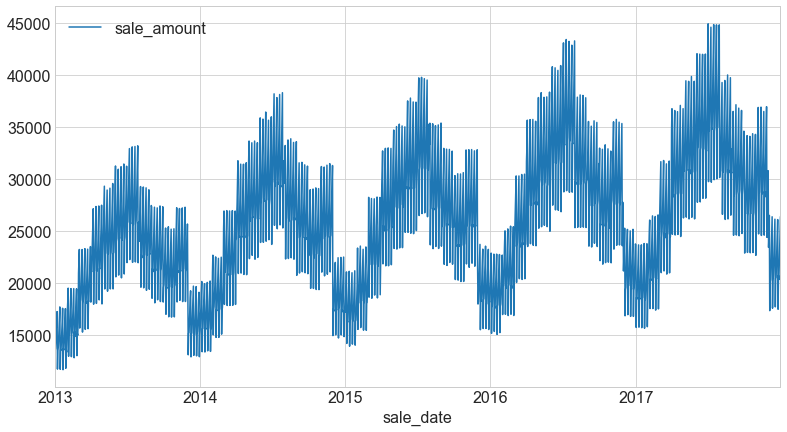

In [11]:
by_date.plot(x='sale_date', y='sale_amount')

In [12]:
df['sales_total'] =  df['sale_amount'] * df['item_price']

In [13]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,sales_total
sale_date,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,10.92
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,30.16
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,308.48
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,197.55
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,25.16


Store Item Demand

Using a human-based approach, split your dataset into train and test sets.

In [14]:
train = df[:'2016'] # includes 2016
test = df['2017']

train_by_date = train.groupby(['sale_date']).sale_amount.sum().reset_index()
#train_by_date.plot(x='sale_date', y='sale_amount')

test_by_date = test.groupby(['sale_date']).sale_amount.sum().reset_index()
#test_by_date.plot(x='sale_date', y='sale_amount')



In [15]:
train.tail(1)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,sales_total
sale_date,,,,,,,,,,,,,,
2016-12-31,7,23,70670009658,70670009658,Reese,Reese Mandarin Oranges Segments In Light Syrup,1.78,414137,20,12018 Perrin Beitel Rd,78217,San Antonio,TX,35.6


In [16]:
test.head(1)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,sales_total
sale_date,,,,,,,,,,,,,,
2017-01-01,6,14,41167300121,41167300121,Pamprin,Pamprin Maximum Strength Multi-symptom Menstru...,7.54,247972,47,1015 S WW White Rd,78220,San Antonio,TX,354.38


Visualize your train-test split.

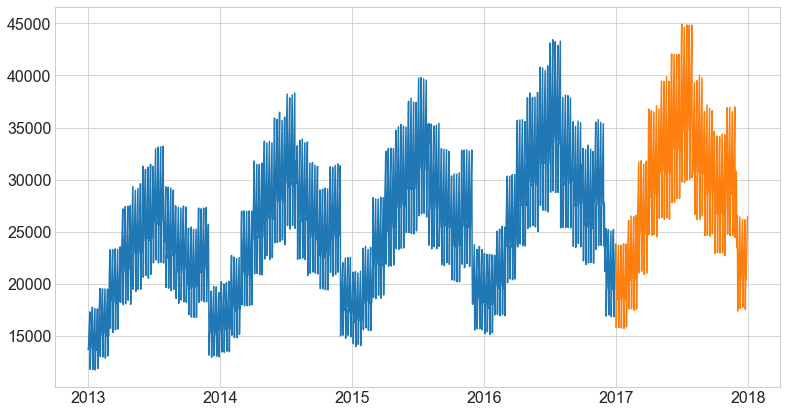

In [17]:
plt.plot(train_by_date.sale_date, train_by_date.sale_amount)
plt.plot(test_by_date.sale_date, test_by_date.sale_amount)
plt.show()

In [ ]:
y = train.temp
y.head()

In [18]:
y = train.sales_total
y.head()

sale_date
2013-01-01     10.92
2013-01-01     30.16
2013-01-01    308.48
2013-01-01    197.55
2013-01-01     25.16
Name: sales_total, dtype: float64

In [19]:
y.index

DatetimeIndex(['2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01',
               ...
               '2016-12-31', '2016-12-31', '2016-12-31', '2016-12-31',
               '2016-12-31', '2016-12-31', '2016-12-31', '2016-12-31',
               '2016-12-31', '2016-12-31'],
              dtype='datetime64[ns]', name='sale_date', length=730500, freq=None)

<AxesSubplot:title={'center':'Distribution of Total Sales'}, xlabel='Total Sales', ylabel='Frequency'>

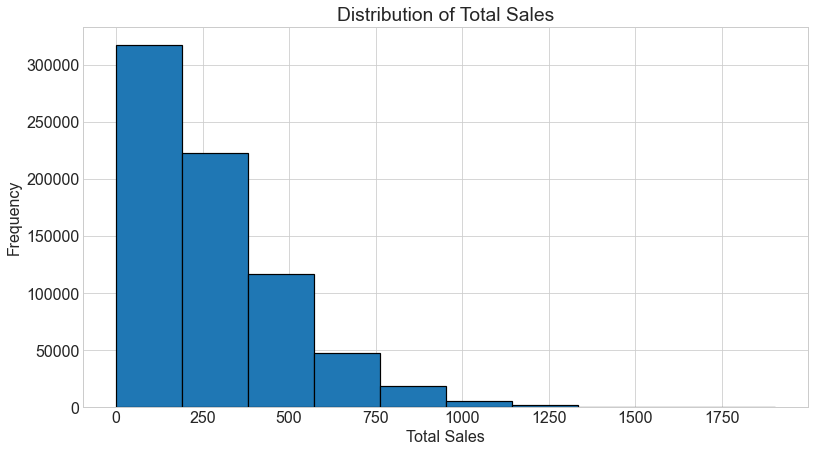

In [20]:
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
y.plot.hist(linewidth=1.2, edgecolor='black')

In [21]:
# make an new column 'month'
train['month'] = train.index.strftime('%m-%b')

In [22]:
train.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,sales_total,month
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,10.92,01-Jan
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,30.16,01-Jan
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,308.48,01-Jan
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,197.55,01-Jan
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,25.16,01-Jan


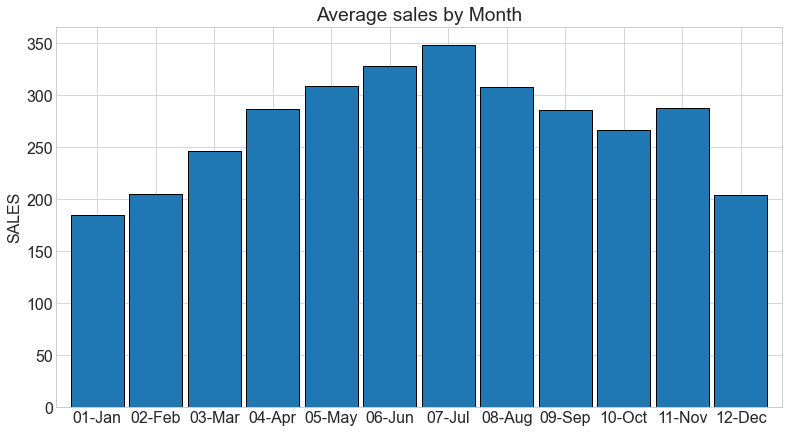

In [23]:
ax = train.groupby(train.month).sales_total.mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average sales by Month', xlabel='', ylabel='SALES')
plt.show()

In [25]:
train.groupby('month').describe().T

month                    01-Jan        02-Feb        03-Mar        04-Apr  \
store_id    count  62000.000000  56500.000000  62000.000000  60000.000000   
            mean       5.500000      5.500000      5.500000      5.500000   
            std        2.872304      2.872307      2.872304      2.872305   
            min        1.000000      1.000000      1.000000      1.000000   
            25%        3.000000      3.000000      3.000000      3.000000   
...                         ...           ...           ...           ...   
sales_total min        0.000000      1.680000      3.000000      5.040000   
            25%       66.230000     73.060000     89.100000    103.590000   
            50%      159.400000    176.220000    212.390000    247.260000   
            75%      268.150000    295.740000    354.380000    411.600000   
            max     1093.200000   1065.870000   1421.160000   1658.020000   

month                    05-May        06-Jun        07-Jul        08-Aug  \
store_id    count  62000.000000  60000.000000  62000.000000  62000.000000   
            mean       5.500000      5.500000      5.500000      5.500000   
            std        2.872304      2.872305      2.872304      2.872304   
            min        1.000000      1.000000      1.000000      1.000000   
            25%        3.000000      3.000000      3.000000      3.000000   
...                         ...           ...           ...           ...   
sales_total min        5.040000      5.040000      5.880000      4.200000   
            25%      112.400000    119.070000    126.360000    112.400000   
            50%      267.240000    283.650000    301.320000    267.000000   
            75%      444.860000    472.290000    503.400000    443.440000   
            max     1512.260000   1667.130000   1903.990000   1557.810000   

month                    09-Sep        10-Oct        11-Nov        12-Dec  
store_id    count  60000.000000  62000.000000  60000.000000  62000.000000  
            mean       5.500000      5.500000      5.500000      5.500000  
            std        2.872305      2.872304      2.872305      2.872304  
            min        1.000000      1.000000      1.000000      1.000000  
            25%        3.000000      3.000000      3.000000      3.000000  
...                         ...           ...           ...           ...  
sales_total min        4.200000      3.360000      4.200000      0.840000  
            25%      103.620000     96.160000    104.160000     73.060000  
            50%      247.590000    228.800000    248.400000    176.190000  
            75%      411.600000    384.480000    414.700000    294.150000  
            max     1466.710000   1430.270000   1703.570000   1229.850000  

[72 rows x 12 columns]

Only use your train data set to perform the following tasks:

Resample your data and visualize it.

Creating a rolling (moving) average of your data and visualize it.

Plot the difference in sales from one day to the next.

Plot the % difference in sales from one day to the next.

Plot the % difference in sales from one week to the next.

Plot the % difference in sales from one month to the next.

Visualize an autocorrelation plot on a weekly resampling.

Visualize a seasonal decomposition plot on a weekly resampling.